In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\ANKUSH\Desktop\AI ML\AI\datasets\monthly_milk_production.csv', index_col='Date',parse_dates=True)

In [3]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [4]:
df.loc['1962-01':'1962-04']

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656


In [5]:
df.loc['1963'].mean()

Production    630.0
dtype: float64

<Axes: xlabel='Date'>

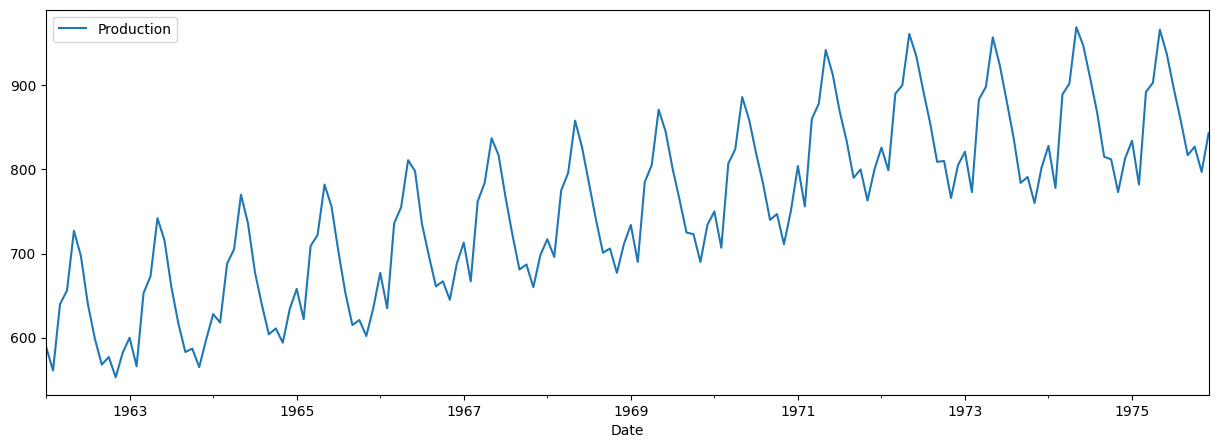

In [6]:
df.plot(figsize=(15,5))

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [9]:
df.index.freq = 'MS'

In [10]:
result = seasonal_decompose(df['Production'])

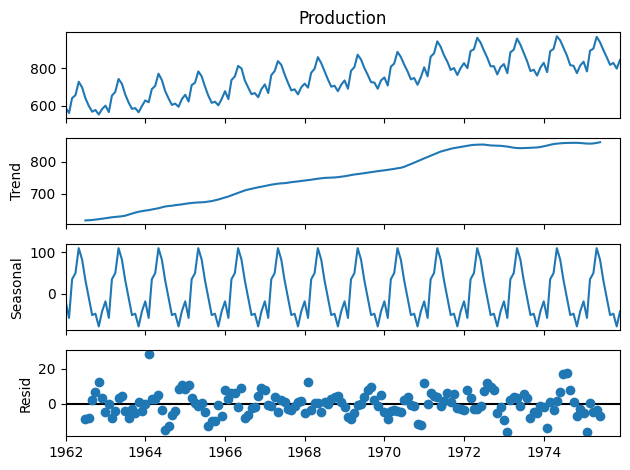

<Figure size 1200x800 with 0 Axes>

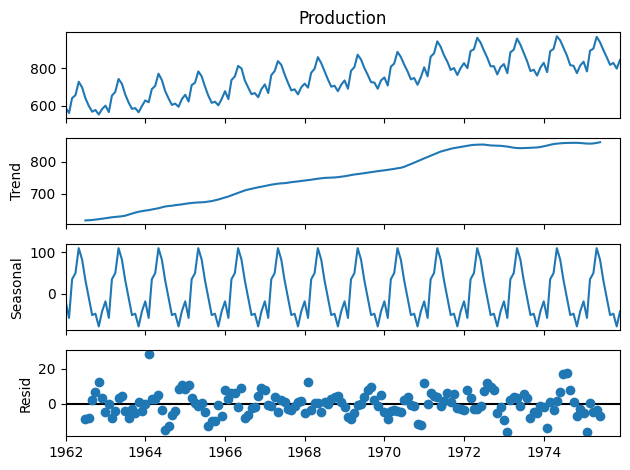

In [42]:
plt.figure(figsize=(12,8))
result.plot()

In [12]:
len(df)

168

In [13]:
train = df.iloc[:156]
test = df.iloc[156:]

In [14]:
len(train)

156

In [15]:
len(test)

12

In [16]:
train.iloc[0], train.iloc[-1]

(Production    589
 Name: 1962-01-01 00:00:00, dtype: int64,
 Production    813
 Name: 1974-12-01 00:00:00, dtype: int64)

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
scaler.fit(train)

MinMaxScaler()

In [20]:
scaled_test = scaler.transform(test)
scaled_train = scaler.transform(train)

In [21]:
scaled_train[:5]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923]])

In [22]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [23]:
n_input = 3

In [24]:
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [25]:
len(generator)

153

In [26]:
x, y = generator[0]
x.ravel(), y

(array([0.08653846, 0.01923077, 0.20913462]), array([[0.24759615]]))

In [27]:
x, y = generator[1]
x.ravel(), y

(array([0.01923077, 0.20913462, 0.24759615]), array([[0.41826923]]))

In [28]:
x, y = generator[2]
x.ravel(), y

(array([0.20913462, 0.24759615, 0.41826923]), array([[0.34615385]]))

In [29]:
print(x.shape)
print(y.shape)

(1, 3, 1)
(1, 1)


In [30]:
n_input1 = 12

In [31]:
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input1, batch_size=1)

In [32]:
x, y = generator[0]
x.ravel(), y

(array([0.08653846, 0.01923077, 0.20913462, 0.24759615, 0.41826923,
        0.34615385, 0.20913462, 0.11057692, 0.03605769, 0.05769231,
        0.        , 0.06971154]),
 array([[0.11298077]]))

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [34]:
model = Sequential()

In [35]:
model.add(LSTM(1000, activation='relu', input_shape=(12,1)))
model.add(Dense(1))


In [36]:
model.compile(optimizer='adam', loss='mse')

In [37]:
model.fit(generator, epochs=40)

Epoch 1/40

144/144 [==============================] - 23s 126ms/step - loss: 0.0364
Epoch 2/40
144/144 [==============================] - 18s 123ms/step - loss: 0.0214
Epoch 3/40
144/144 [==============================] - 21s 148ms/step - loss: 0.0100
Epoch 4/40
144/144 [==============================] - 19s 129ms/step - loss: 0.0064
Epoch 5/40
144/144 [==============================] - 18s 127ms/step - loss: 0.0030
Epoch 6/40
144/144 [==============================] - 18s 125ms/step - loss: 0.0032
Epoch 7/40
144/144 [==============================] - 19s 128ms/step - loss: 0.0028
Epoch 8/40
144/144 [==============================] - 18s 128ms/step - loss: 0.0054
Epoch 9/40
144/144 [==============================] - 17s 120ms/step - loss: 0.0036
Epoch 10/40
144/144 [==============================] - 20s 136ms/step - loss: 0.0027
Epoch 11/40
144/144 [==============================] - 19s 129ms/step - loss: 0.0040
Epoch 12/40
144/144 [==============================] - 19s 131ms/step - l

In [43]:
loss = model.history.history['loss']

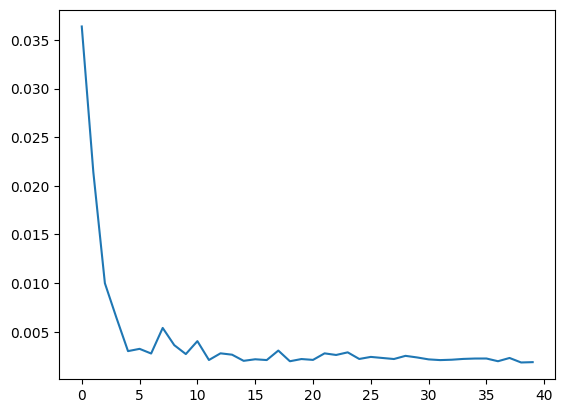

In [44]:
plt.plot(loss)

In [45]:
last_train_batch = scaled_train[-12:]

In [46]:
last_train_batch

array([[0.66105769],
       [0.54086538],
       [0.80769231],
       [0.83894231],
       [1.        ],
       [0.94711538],
       [0.85336538],
       [0.75480769],
       [0.62980769],
       [0.62259615],
       [0.52884615],
       [0.625     ]])

In [47]:
last_train_batch = last_train_batch.reshape((1,12,1))
last_train_batch

array([[[0.66105769],
        [0.54086538],
        [0.80769231],
        [0.83894231],
        [1.        ],
        [0.94711538],
        [0.85336538],
        [0.75480769],
        [0.62980769],
        [0.62259615],
        [0.52884615],
        [0.625     ]]])

In [48]:
model.predict(last_train_batch)

1/1 [==============================] - 1s 578ms/step


array([[0.6728732]], dtype=float32)

In [49]:
scaled_test[0]

array([0.67548077])

In [51]:
test_pred = []

first_eval_batch = scaled_train[-12:]
current_batch = first_eval_batch.reshape((1,12,1))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_pred.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

1/1 [==============================] - 0s 79ms/step


In [52]:
test_pred

[array([0.6728732], dtype=float32),
 array([0.57941645], dtype=float32),
 array([0.82074106], dtype=float32),
 array([0.87422264], dtype=float32),
 array([1.0335807], dtype=float32),
 array([0.9918176], dtype=float32),
 array([0.8990857], dtype=float32),
 array([0.7924179], dtype=float32),
 array([0.66859615], dtype=float32),
 array([0.6426527], dtype=float32),
 array([0.55926126], dtype=float32),
 array([0.63371676], dtype=float32)]

In [53]:
true_pred = scaler.inverse_transform(test_pred)


In [54]:
test['Predicted Production'] = true_pred

In [55]:
test.head()

,Production,Predicted Production
Date,,
1975-01-01,834,832.915251
1975-02-01,782,794.037245
1975-03-01,892,894.428280
1975-04-01,903,916.676617
1975-05-01,966,982.969555


<Axes: xlabel='Date'>

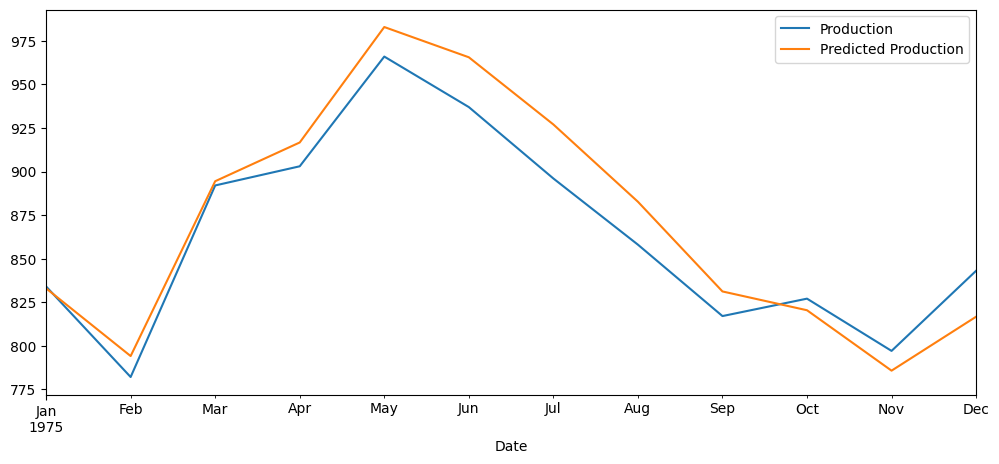

In [56]:
test.plot(figsize=(12,5))

In [57]:
from sklearn.metrics import mean_squared_error

In [58]:
rsme = np.sqrt(mean_squared_error(test['Production'], test['Predicted Production']))

In [59]:
rsme

18.44549132353121